## Homework 2: Machine Learning for Regression

> Note: sometimes your answer doesn't match one of 
> the options exactly. That's fine. 
> Select the option that's closest to your solution.


### Dataset

In this homework, we will use the Laptops price dataset from [Kaggle](https://www.kaggle.com/datasets/juanmerinobermejo/laptops-price-dataset).

Here's a wget-able [link](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv):

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv
```

The goal of this homework is to create a regression model for predicting the prices (column `'Final Price'`).


In [1]:
import pandas as pd
import numpy as np

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv'
df = pd.read_csv(data)
df

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99


### Preparing the dataset 

First, we'll normalize the names of the columns:

```python
df.columns = df.columns.str.lower().str.replace(' ', '_')
```

Now, instead of `'Final Price'`, we have `'final_price'`.

Next, use only the following columns:

* `'ram'`,
* `'storage'`,
* `'screen'`,
* `'final_price'`


In [3]:
df.columns

Index(['Laptop', 'Status', 'Brand', 'Model', 'CPU', 'RAM', 'Storage',
       'Storage type', 'GPU', 'Screen', 'Touch', 'Final Price'],
      dtype='object')

In [4]:
# Normalize the names of the columns
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['laptop', 'status', 'brand', 'model', 'cpu', 'ram', 'storage',
       'storage_type', 'gpu', 'screen', 'touch', 'final_price'],
      dtype='object')

In [5]:
columns_filter = ['ram', 'storage', 'screen', 'final_price']
df_filtered = df[columns_filter]
df_filtered.head(n=5)

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01


### EDA

* Look at the `final_price` variable. Does it have a long tail? 

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure all these plots can be displayed in a notebook
%matplotlib inline

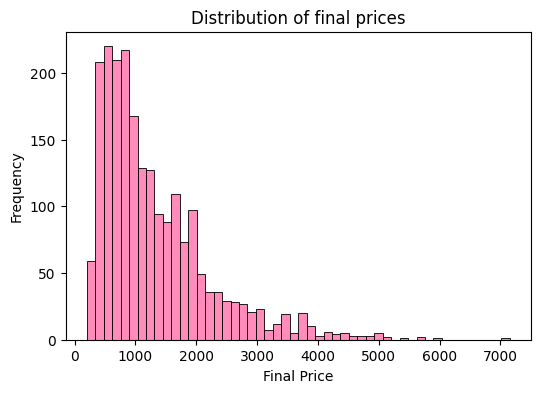

In [7]:
# Plot the histogram of final_price
plt.figure(figsize=(6, 4))

sns.histplot(df_filtered.final_price, bins=50, color='#ff66a3')
plt.ylabel('Frequency')
plt.xlabel('Final Price')
plt.title('Distribution of final prices')

plt.show()

In [8]:
df_filtered.final_price.describe().round(2)

count    2160.00
mean     1312.64
std       911.48
min       201.05
25%       661.08
50%      1031.95
75%      1708.97
max      7150.47
Name: final_price, dtype: float64

In [9]:
# Calculate skewness
skewness = df_filtered.final_price.skew()
print(f"Skewness: {skewness:.2f}")

Skewness: 1.65


The `final_price` variable has a long tail distribution because the histogram is skewed to the right, where the tail on the right side is longer than usual, and the peak (highest point) of the graph lies to the left side of the center. On the right side of the graph, the frequencies of observations are lower than the frequencies of observations to the left side, meaning the larger values are not as common, while the smaller values appear more often in the data.

Right-skewed distributions also indicate that the mean, or average, is greater than the median. There are values in the dataset that are much greater than the median, or the value where 50% of the data is either lower or higher.

**Understanding Skewness**

Skewness refers to the asymmetry or lack of symmetry in the distribution of data. A dataset is considered skewed if the distribution is not symmetrical, meaning that the tail of the distribution is longer on one side than the other. 

Skewness can manifest in two forms:
1. **Positive Skewness (Right-skewed)**: In a positively skewed distribution, the tail of the distribution extends to the right, indicating that the majority of the data points are concentrated on the left side, with a few outliers on the right.
2. **Negative Skewness (Left-skewed)**: Conversely, in a negatively skewed distribution, the tail of the distribution extends to the left, indicating that the majority of the data points are concentrated on the right side, with a few outliers on the left.

Skewed data can pose significant challenges in machine learning:
1. **Biased Models**: Machine learning models trained on skewed data may exhibit bias towards the majority class or the dominant range of values, leading to poor generalization performance on unseen data.
2. **Inaccurate Predictions**: Skewed data can distort the relationship between input features and target variables, resulting in inaccurate predictions and unreliable insights.
3. **Suboptimal Performance**: Skewed data can hinder the performance of various machine learning algorithms, especially those that assume a normal distribution of data, such as linear regression and logistic regression.

**Handling Skewness:**

To mitigate the effects of skewness and improve the performance of machine learning models, data preprocessing techniques and transformations can be applied. Here are some common approaches:

- **Log Transformation**:
    - Log transformation is particularly effective for reducing right-skewness in data.
    - It involves applying the natural logarithm (or other logarithmic functions) to the skewed feature, which compresses large values and expands small values.
    - Log transformation can help stabilize variance and make the distribution more symmetrical.

- **Box-Cox Transformation**:
    - The Box-Cox transformation is a versatile method that can handle both positive and negative skewness.
    - It uses a power transformation parameter (lambda) to find the optimal transformation that maximizes the normality of the data.
    - The Box-Cox transformation is effective for a wide range of distributions and can be applied to multiple features simultaneously.

- **Yeo-Johnson Transformation**:
    - Similar to the Box-Cox transformation, the Yeo-Johnson transformation is a power transformation method that can handle skewed data.
    - Unlike Box-Cox, Yeo-Johnson allows for transformation of both positive and negative values, making it more flexible in practice.

By understanding the nature of skewness and applying appropriate preprocessing methods such as log transformation, Box-Cox transformation, or data binning, data scientists can improve the performance and reliability of their machine-learning models. As the saying goes, *“A well-transformed dataset is the foundation of a robust machine-learning model.”*

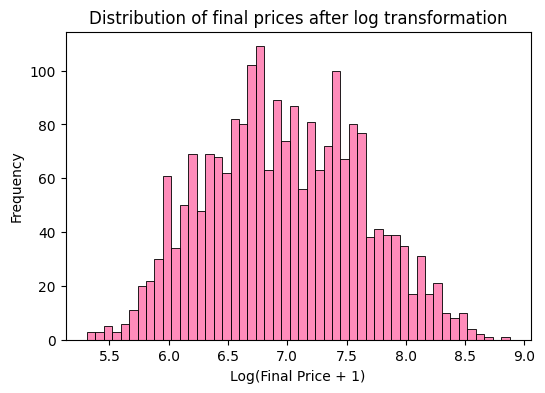

In [10]:
# Plot the histogram of final_price after applying log transformation
plt.figure(figsize=(6, 4))

final_price_logs = np.log1p(df_filtered.final_price)
sns.histplot(final_price_logs, bins=50, color='#ff66a3')
plt.ylabel('Frequency')
plt.xlabel('Log(Final Price + 1)')
plt.title('Distribution of final prices after log transformation')

plt.show()

### Question 1

There's one column with missing values. What is it?

* `'ram'`
* `'storage'`
* `'screen'`
* `'final_price'`

In [11]:
df_filtered.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

**Ans:** `screen` 

### Question 2

What's the median (50% percentile) for variable `'ram'`?

- 8
- 16
- 24
- 32

In [12]:
df_filtered.ram.median()

np.float64(16.0)

**Ans:** The median for `ram` is 16.

### Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.

Use the same code as in the lectures

In [13]:
n = len(df_filtered)
n

2160

In [14]:
df_filtered

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01
...,...,...,...,...
2155,16,1000,17.3,2699.99
2156,16,1000,17.3,2899.99
2157,32,1000,17.3,3399.99
2158,16,1000,13.4,1899.99


In [15]:
# Generate a sequence of numbers from 1 to n-1
idx = np.arange(n)
idx

array([   0,    1,    2, ..., 2157, 2158, 2159])

In [16]:
# To make sure the results are reproducible, we usually set a random seed
np.random.seed(42)
# Shuffle the idx
np.random.shuffle(idx)
idx

array([2079,  668, 2073, ..., 1130, 1294,  860])

In [17]:
# Instead of getting the rows directly from iloc, we get them through idx
df_filtered.iloc[idx[:5]]

,ram,storage,screen,final_price
2079,32,1000,15.6,1123.29
668,4,64,14.1,201.05
2073,32,1000,14.0,997.74
1113,16,512,13.3,1016.00
788,32,1000,16.0,2739.00


In [18]:
# Split data into train/val/test sets, with 60%/20%/20% distribution

# Size of validation dataset
n_val = int(n * 0.2)
# Size of test dataset
n_test = int(n * 0.2)
# Size of train dataset
n_train = n - n_val - n_test

n_train, n_val, n_test

(1296, 432, 432)

In [19]:
n_train + n_val + n_test, n

(2160, 2160)

In [20]:
df_train = df_filtered.iloc[idx[:n_train]]
df_val = df_filtered.iloc[idx[n_train:n_train+n_val]]
df_test = df_filtered.iloc[idx[n_train+n_val:]]

In [21]:
df_train.head(n=5)

,ram,storage,screen,final_price
2079,32,1000,15.6,1123.29
668,4,64,14.1,201.05
2073,32,1000,14.0,997.74
1113,16,512,13.3,1016.00
788,32,1000,16.0,2739.00


In [22]:
# Reset the index and drop the original indices from the dataframe
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [23]:
df_train.head(n=5)

,ram,storage,screen,final_price
0,32,1000,15.6,1123.29
1,4,64,14.1,201.05
2,32,1000,14.0,997.74
3,16,512,13.3,1016.00
4,32,1000,16.0,2739.00


In [24]:
len(df_train), len(df_val), len(df_test)

(1296, 432, 432)

In [25]:
# Get the underlying numpy arrays instead of pandas series
y_train = df_train.final_price.values
y_val = df_val.final_price.values
y_test = df_test.final_price.values

In [26]:
y_train[:5], y_val[:5], y_test[:5]

(array([1123.29,  201.05,  997.74, 1016.  , 2739.  ]),
 array([2599.  ,  999.  ,  477.28, 1519.  ,  402.99]),
 array([4805.65, 2189.  , 1349.  , 2175.83, 1248.59]))

In [27]:
# Remove final_price variable from dataframe to avoid accidentally using it 
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

In [28]:
df_train.columns

Index(['ram', 'storage', 'screen'], dtype='object')

In [29]:
len(y_train)

1296

### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:

- With 0
- With mean
- Both are equally good

In [30]:
def prepare_X(df, fill_na_value):
    df_copy = df.copy()
    df_copy = df_copy.fillna(fill_na_value)
    return df_copy.values

In [31]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [32]:
# Option 1: Fill the missing values with 0
X_train = prepare_X(df_train, fill_na_value=0)

# Train a linear regression model without regularization
w0, w = train_linear_regression(X_train, y_train)
w0, w

(np.float64(676.8954853003862),
 array([ 43.70681555,   0.86506867, -36.10399833]))

In [33]:
y_pred = w0 + X_train.dot(w)
y_pred

array([2377.35987681,  398.02076576, 2435.12627415, ..., 1255.89731808,
       1313.66371541, 1313.66371541])

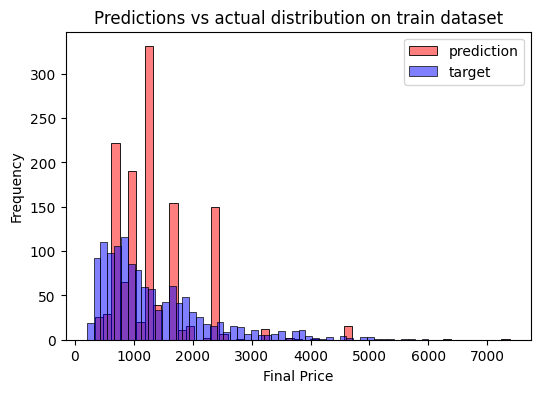

In [34]:
plt.figure(figsize=(6, 4))

sns.histplot(y_pred, label='prediction', color='red', alpha=0.5, bins=50)
sns.histplot(y_train, label='target', color='blue',  alpha=0.5, bins=50)
plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Final Price')
plt.title('Predictions vs actual distribution on train dataset')

plt.show()

In [35]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [36]:
train_score_with_0 = round(rmse(y_train, y_pred), 2)
train_score_with_0

np.float64(602.39)

In [37]:
# Use the validation dataset to evaluate the model
X_val = prepare_X(df_val, fill_na_value=0)
y_pred = w0 + X_val.dot(w)

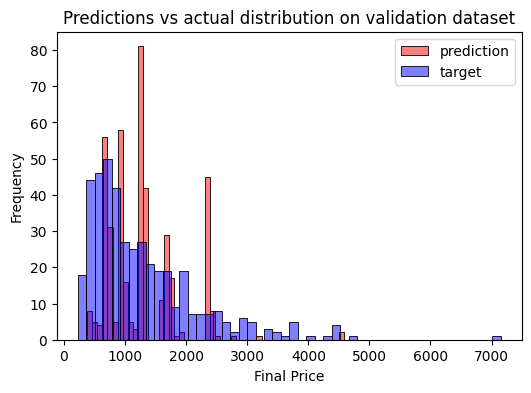

In [38]:
plt.figure(figsize=(6, 4))

sns.histplot(y_pred, label='prediction', color='red', alpha=0.5, bins=50)
sns.histplot(y_val, label='target', color='blue',  alpha=0.5, bins=50)
plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Final Price')
plt.title('Predictions vs actual distribution on validation dataset')

plt.show()

In [39]:
val_score_with_0 = round(rmse(y_val, y_pred), 2)
val_score_with_0 

np.float64(597.36)

In [40]:
# Compute the mean using the train dataset
mean = df_train.screen.mean()
mean

np.float64(15.163534416086618)

In [41]:
# Option 2: Fill the missing values with the mean of screen variable
X_train = prepare_X(df_train, fill_na_value=mean)

# Train a linear regression model without regularization
w0, w = train_linear_regression(X_train, y_train)
w0, w

(np.float64(808.9159907333465),
 array([ 43.90774584,   0.87135236, -45.18273312]))

In [42]:
y_pred = w0 + X_train.dot(w)
y_pred

array([2380.46558232,  403.23698821, 2452.75795532, ..., 1252.72169651,
       1325.01406951, 1325.01406951])

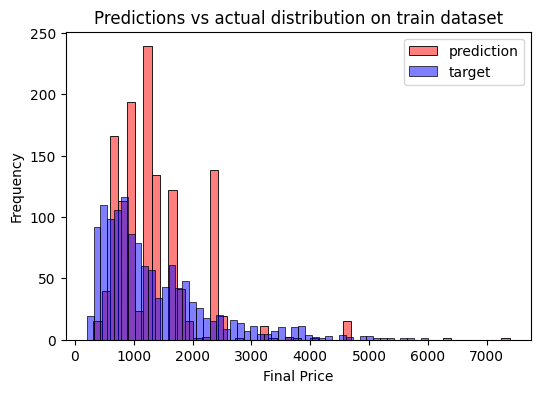

In [43]:
plt.figure(figsize=(6, 4))

sns.histplot(y_pred, label='prediction', color='red', alpha=0.5, bins=50)
sns.histplot(y_train, label='target', color='blue',  alpha=0.5, bins=50)
plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Final Price')
plt.title('Predictions vs actual distribution on train dataset')

plt.show()

In [44]:
train_score_with_mean = round(rmse(y_train, y_pred), 2)
train_score_with_mean

np.float64(602.18)

In [45]:
# Use the validation dataset to evaluate the model
X_val = prepare_X(df_val, fill_na_value=mean)
y_pred = w0 + X_val.dot(w)

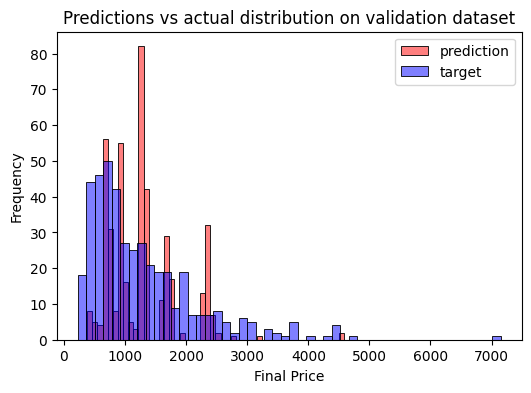

In [46]:
plt.figure(figsize=(6, 4))

sns.histplot(y_pred, label='prediction', color='red', alpha=0.5, bins=50)
sns.histplot(y_val, label='target', color='blue',  alpha=0.5, bins=50)
plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Final Price')
plt.title('Predictions vs actual distribution on validation dataset')

plt.show()

In [47]:
val_score_with_mean = round(rmse(y_val, y_pred), 2)
val_score_with_mean 

np.float64(600.27)

In [48]:
# Compare the RMSE of each option
if val_score_with_0 < val_score_with_mean:
    print('Which option gives better RMSE? With 0\nRMSE score:', val_score_with_0)
elif val_score_with_0 > val_score_with_mean:
    print('Which option gives better RMSE? With mean\nRMSE score:', val_score_with_mean)
else:
    print('Which option gives better RMSE? Both are equally good\nRMSE score:', val_score_with_0, val_score_with_mean)

Which option gives better RMSE? With 0
RMSE score: 597.36


**Ans:** Filling the missing values with 0 gives better RMSE.

### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.01, 0.1, 1, 5, 10, 100]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:

- 0
- 0.01
- 1
- 10
- 100

In [49]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [50]:
# Try different values of r from this list
r_list = [0, 0.01, 0.1, 1, 5, 10, 100]

In [51]:
# Train a regularized linear regression model for each different values of r to evaluate the model
result = {}
X_train = prepare_X(df_train, fill_na_value=0)
X_val = prepare_X(df_val, fill_na_value=0)
for r in r_list:
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    
    # Evaluate the model on the validation dataset
    y_pred = w0 + X_val.dot(w)
    
    # Compute the RMSE of this model
    error = rmse(y_val, y_pred)
    result[r] = round(error, 2)
    print(f"r = {r}, RMSE (Validation dataset) = {result[r]}")

r = 0, RMSE (Validation dataset) = 597.36
r = 0.01, RMSE (Validation dataset) = 597.36
r = 0.1, RMSE (Validation dataset) = 597.35
r = 1, RMSE (Validation dataset) = 597.21
r = 5, RMSE (Validation dataset) = 597.01
r = 10, RMSE (Validation dataset) = 597.06
r = 100, RMSE (Validation dataset) = 597.9


In [52]:
print("Which r gives the best RMSE? ", min(result, key=result.get))

Which r gives the best RMSE?  5


In [53]:
# A list of available options to the question
options = [0, 0.01, 1, 10, 100]

def select_smallest_r_with_best_RMSE(options):
    best_r = options[0]
    min_error = result[options[0]]
    for r, error in result.items():
        if r in options:
            if error < min_error:
                min_error = error
                best_r = r
            elif error == min_error:
                best_r = min(r, best_r)
    return best_r, min_error

# Select the closest solution to the question
r, error = select_smallest_r_with_best_RMSE(options)
print(f"r = {r}, RMSE (Validation dataset) = {error}")

r = 10, RMSE (Validation dataset) = 597.06


**Ans:** `r = 5` gives the best RMSE. However, `5` is not an available option for this question so the next closest to the solution would be `r = 10`. 

### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

- 19.176
- 29.176
- 39.176
- 49.176

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.

In [54]:
# A list of different seed values for selection
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

n = len(df_filtered)
# Size of validation dataset
n_val = int(n * 0.2)
# Size of test dataset
n_test = int(n * 0.2)
# Size of train dataset
n_train = n - n_val - n_test

errors = []

for seed in seeds:
    idx = np.arange(n)
    
    # Try different seed values
    np.random.seed(seed)
    np.random.shuffle(idx)

    # Perform train/validation/test split with 60%/20%/20% distribution
    df_train = df_filtered.iloc[idx[:n_train]]
    df_val = df_filtered.iloc[idx[n_train:n_train+n_val]]
    df_test = df_filtered.iloc[idx[n_train+n_val:]]

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train = df_train.final_price.values
    y_val = df_val.final_price.values
    y_test = df_test.final_price.values

    del df_train['final_price']
    del df_val['final_price']
    del df_test['final_price']

    # Fill the missing values with 0 and train a linear regression model without regularization
    w0, w = train_linear_regression(prepare_X(df_train, fill_na_value=0), y_train)
    
    # Evaluate the model on the validation dataset
    y_pred = w0 + prepare_X(df_val, fill_na_value=0).dot(w)
    
    # Collect the RMSE score of each model trained with a different seed value
    errors.append(rmse(y_val, y_pred))

In [55]:
for i in range(len(seeds)):
    print(f"Seed: {seeds[i]}, RMSE (Validation dataset) = {errors[i]}")

Seed: 0, RMSE (Validation dataset) = 565.4520868770983
Seed: 1, RMSE (Validation dataset) = 636.7985423056728
Seed: 2, RMSE (Validation dataset) = 588.9558697907958
Seed: 3, RMSE (Validation dataset) = 597.8148920012524
Seed: 4, RMSE (Validation dataset) = 571.9627915111038
Seed: 5, RMSE (Validation dataset) = 573.2383256618933
Seed: 6, RMSE (Validation dataset) = 647.343832840719
Seed: 7, RMSE (Validation dataset) = 550.4398184485982
Seed: 8, RMSE (Validation dataset) = 587.3335036169883
Seed: 9, RMSE (Validation dataset) = 576.1017929433114


In [56]:
# Compute the standard deviation of all the scores and round the result to 3 decimal digits
std = round(np.std(errors), 3)
std

np.float64(29.176)

**Ans:** The value of std is `29.176`.

### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:

- 598.60
- 608.60
- 618.60
- 628.60

In [57]:
# Perform train/validation/test split with 60%/20%/20% distribution
n = len(df_filtered)
# Size of validation dataset
n_val = int(n * 0.2)
# Size of test dataset
n_test = int(n * 0.2)
# Size of train dataset
n_train = n - n_val - n_test

idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

df_train = df_filtered.iloc[idx[:n_train]]
df_val = df_filtered.iloc[idx[n_train:n_train+n_val]]
df_test = df_filtered.iloc[idx[n_train+n_val:]]

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.final_price.values
y_val = df_val.final_price.values
y_test = df_test.final_price.values

del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

# Combine train and validation datasets
df_combined = pd.concat([df_train, df_val])
df_combined

,ram,storage,screen
0,32,1000,15.6
1,8,512,13.3
2,8,512,15.6
3,32,1000,17.3
4,16,1000,16.0
...,...,...,...
427,16,512,14.0
428,16,512,13.3
429,8,256,15.6
430,16,512,15.6


In [58]:
y_combined = np.concatenate([y_train, y_val])
y_combined

array([1592.89, 1349.  ,  549.  , ...,  849.  ,  711.94,  779.01])

In [59]:
# Verify the size adds up
len(y_combined), n_train + n_val

(1728, 1728)

In [60]:
# Fill the missing values with 0 and train a regularized linear regression model with r = 0.001
w0, w = train_linear_regression_reg(prepare_X(df_combined, fill_na_value=0), y_combined, r=0.001)

# Evaluate the model on the test dataset
y_pred = w0 + prepare_X(df_test, fill_na_value=0).dot(w)

# Compute the RMSE
test_rmse = rmse(y_test, y_pred)
test_rmse

np.float64(608.6099822049573)

**Ans:** The RMSE is `608.60` on the test dataset. 

## Submit the results

* Submit your results here: https://courses.datatalks.club/ml-zoomcamp-2024/homework/hw02
* If your answer doesn't match options exactly, select the closest one